In [1]:
from util.sql_switch import query_sql

# reducing the size of the df for debugging
# df = df.loc[df["conversation_id"] == 1426273610289848324]
fieldnames = ["id", "conversation_id", "author_id", "created_at", "in_reply_to_user_id", "text", "tn_parent_id",
              "twitter_id"]
df = query_sql(
    fieldnames=fieldnames)  # a utility so I don't have to rewrite the get twitter data for both django and jupyter context

df = df.sort_values(by=['created_at'])
df.reset_index(drop=True, inplace=True)

df['tn_parent_id'] = df['tn_parent_id'].astype('Int64')
df['twitter_id'] = df['twitter_id'].astype('Int64')


using postgres


In [2]:
from matplotlib import pyplot as plt
import networkx as nx

example_conversation = 1470381649363968000
df = df[df["conversation_id"] == 1470381649363968000]
df = df[["twitter_id", "tn_parent_id"]]
# df = df.head(30)

,twitter_id,tn_parent_id
21285,1470381649363968000,<NA>
21286,1470381968122691593,1470381649363968000
21287,1470382286411599874,1470381649363968000


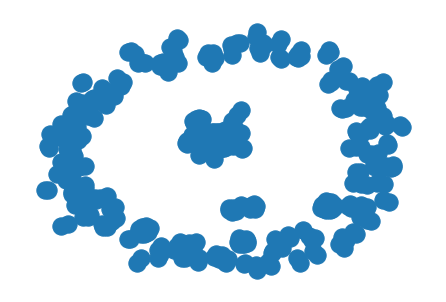

In [3]:
G = nx.Graph()
#G.add_node(1)
G.add_nodes_from(df.twitter_id)
G.add_nodes_from(df.tn_parent_id)
edges = list(df.to_records(index=False))
G.add_edges_from(edges)
nx.draw(G, with_labels=False)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

#plt.show()
df.head(3)


In [4]:
from pandas import NA

df_left = list(df.twitter_id)
df_right = list(df.tn_parent_id)
for parent in df_right:
    if parent is not NA:
        if parent not in df_left:
            print(parent)

1470449188827799552
1470449188827799552
1470387428154355712
1470449188827799552
1470385110411325440
1470387428154355712
1470385110411325440
1470394840370319360
1470385010440122368
1470385010440122368
1470449188827799552
1470385344189284352
1470386619379335168
1470386843891941376
1470388515372507136
1470388371528851456
1470449188827799552
1470388579021074432
1470384783029067776
1470385010440122368
1470388402046615552
1470407988913618944
1470385110411325440
1470388371528851456
1470388402046615552
1470398323681021952
1470394676117229568
1470394676117229568
1470394676117229568
1470402805286514688
1470394676117229568
1470449188827799552
1470449188827799552
1470396417139257344
1470396417139257344
1470396417139257344
1470398323681021952
1470402805286514688
1470396417139257344
1470441274654216192
1470395592354541568
1470396417139257344
1470396417139257344
1470390088249102336
1470395592354541568
1470396417139257344
1470396417139257344
1470398323681021952
1470397141390659584
1470384974285185024
